# Density Based Spatial Clustering of Application

In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

In [3]:
# verifica a versão do matplotlib
print("Versão do matplotlib",matplotlib.__version__)

Versão do matplotlib 3.1.3


### Usually 2 parameters for DBSCAN to Optimize

### determines how much close the points should be to be considered a part of a cluster and determines how many number of samples (points) need to be considered around a point within the radius $\epsilon$ to be considered as a Core Point. MinPts include the point in consideration itself.

## Now we start loading the dataset

In [4]:
# importing pandas package
import pandas as pd

# making data frame from csv file
taxi_data= pd.read_csv(r"C:\Users\carlo\Desktop\Taxi_Trips.csv")


# dropping passed columns
taxi_data.drop(["Trip ID","Taxi ID","Trip Start Timestamp","Trip End Timestamp","Trip Seconds","Trip Miles","Fare","Tips","Tolls","Extras","Trip Total","Pickup Census Tract","Dropoff Census Tract","Payment Type","Company"],axis=1, inplace = True)
print("After dropping some columns")
print(taxi_data)

After dropping some columns
        Pickup Community Area  Dropoff Community Area  \
0                        28.0                    39.0   
1                        28.0                    32.0   
2                        32.0                    35.0   
3                        59.0                    59.0   
4                         8.0                    22.0   
...                       ...                     ...   
278281                    3.0                     3.0   
278282                    8.0                     8.0   
278283                    7.0                    21.0   
278284                   32.0                    32.0   
278285                    8.0                    32.0   

        Pickup Centroid Latitude  Pickup Centroid Longitude  \
0                      41.874005                 -87.663518   
1                      41.885300                 -87.642808   
2                      41.878866                 -87.625192   
3                      41.833518   

In [5]:
# check the nan values in the dataframe
taxi_data.isna().sum()

Pickup Community Area           34
Dropoff Community Area        7325
Pickup Centroid Latitude         0
Pickup Centroid Longitude        0
Pickup Centroid Location         0
Dropoff Centroid Latitude     6317
Dropoff Centroid Longitude    6317
Dropoff Centroid  Location    6317
dtype: int64

In [6]:
# retorna os cantos do mapa de modo aos pontos caberem lá dentro 
# ordem de retorno é lllongitude,lllatitude,urlongitude,urlatitude (ll=lower left; ur=upper right)
# dicionário de entrada deve ter as colunas do pickup e dropoff com os numeros corretos
def get_Map_Corners(data_dictionary):
    ll_lat = min(min(data_dictionary['Pickup Centroid Latitude']),min(data_dictionary['Dropoff Centroid Latitude']))
    ll_long = min(min(data_dictionary['Pickup Centroid Longitude']),min(data_dictionary['Dropoff Centroid Longitude']))
    ur_lat = max(max(data_dictionary['Pickup Centroid Latitude']),max(data_dictionary['Dropoff Centroid Latitude']))
    ur_long = max(max(data_dictionary['Pickup Centroid Longitude']),max(data_dictionary['Dropoff Centroid Longitude']))
    return [ll_long,ll_lat,ur_long,ur_lat]


## Dataset

In [7]:
data_size=1000
taxi_data_lim=taxi_data[1:data_size+1] # vai buscar as 10000 primeiras linhas 
# taxi_data_lim=taxi_data

## Pickup Points

-87.913624596 41.706587882 -87.57278198700001 42.009622881


D:\Conda\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


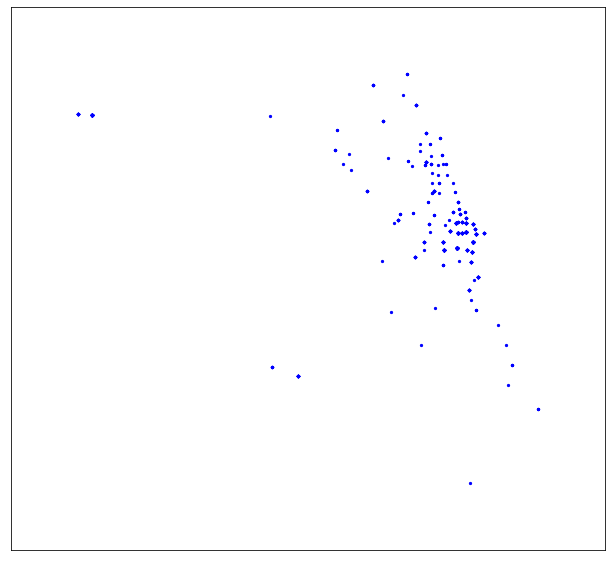

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import folium
from sklearn.cluster import DBSCAN
import pandas as pd
from itertools import cycle
cycol = cycle('bgrcmk')

%matplotlib inline
rcParams['figure.figsize']=(14,10)
# difference between two areas (Dropoff Area and Pickup Area)
#difference_of_areas= taxi_data['Dropoff Community Area'] - taxi_data['Pickup Community Area']
# drop nan values (não interessa para ter valores destes)
#difference_of_areas_without_nan_values2=difference_of_areas.dropna()
#print(difference_of_areas_without_nan_values2)
#difference_of_areas_without_nan_values=difference_of_areas.dropna().values.reshape(-1,1)
#print(difference_of_areas_without_nan_values)


limites = get_Map_Corners(taxi_data_lim)
print(limites[0],limites[1],limites[2],limites[3])

m = Basemap(
    projection='merc', 
    resolution='l', 
    epsg = 4269,
    llcrnrlon=limites[0]-0.05, 
    llcrnrlat=limites[1]-0.05, 
    urcrnrlon=limites[2]+0.05,
    urcrnrlat=limites[3]+0.05
)



# desenhar pontos de pickups
x,y=m(taxi_data_lim['Pickup Centroid Longitude'],taxi_data_lim['Pickup Centroid Latitude'])
m.scatter(x,y,5,marker='o',color = 'b')
#m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)
plt.show()



## Dropoffs

D:\Conda\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


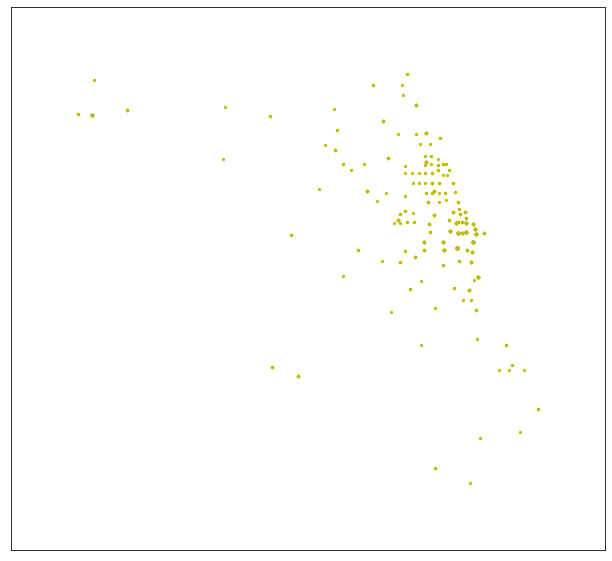

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import folium
from sklearn.cluster import DBSCAN
import pandas as pd
from itertools import cycle
cycol = cycle('bgrcmk')

%matplotlib inline
rcParams['figure.figsize']=(14,10)

limites = get_Map_Corners(taxi_data_lim)
m = Basemap(
    projection='merc', 
    resolution='l', 
    epsg = 4269,
    llcrnrlon=limites[0]-0.05, 
    llcrnrlat=limites[1]-0.05, 
    urcrnrlon=limites[2]+0.05,
    urcrnrlat=limites[3]+0.05
)

# desenhar pontos de dropoffs
r,s = m(taxi_data_lim['Dropoff Centroid Longitude'],taxi_data_lim['Dropoff Centroid Latitude'])
m.scatter(r,s,5,marker='o',color = 'y')
#m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)
plt.show()

## Trajects

D:\Conda\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


1000


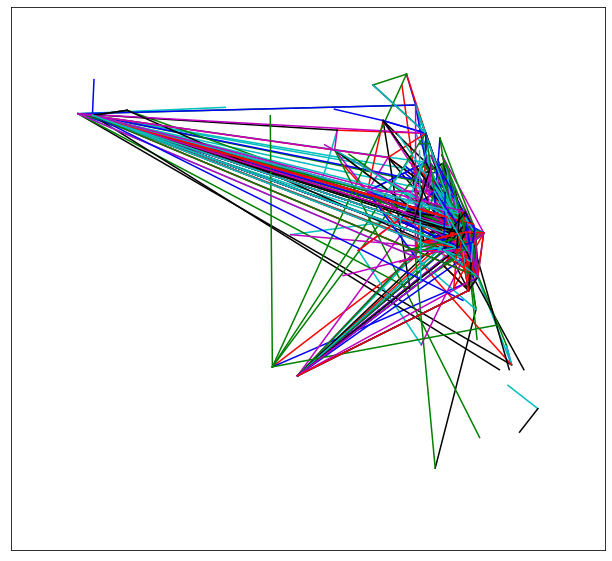

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import folium
from sklearn.cluster import DBSCAN, OPTICS
import pandas as pd
from itertools import cycle
cycol = cycle('bgrcmk')

%matplotlib inline
rcParams['figure.figsize']=(14,10)

limites = get_Map_Corners(taxi_data_lim)
m = Basemap(
    projection='merc', 
    resolution='l', 
    epsg = 4269,
    llcrnrlon=limites[0]-0.05, 
    llcrnrlat=limites[1]-0.05, 
    urcrnrlon=limites[2]+0.05,
    urcrnrlat=limites[3]+0.05
)


#m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)

# desenhar trajetos - partida -> destino
count = len(taxi_data_lim['Pickup Centroid Longitude'])
print(count)

for i in range(1,count+1):
    path_long= [taxi_data_lim['Pickup Centroid Longitude'][i],taxi_data_lim['Dropoff Centroid Longitude'][i]]
    path_lat = [taxi_data_lim['Pickup Centroid Latitude'][i],taxi_data_lim['Dropoff Centroid Latitude'][i]]
    m.plot(path_long,path_lat,marker=None,color=next(cycol))

plt.show()

## DBSCAN dos pickups

In [11]:
lista_pontos = []
for i in range(1,data_size):
    lista_pontos.append([taxi_data_lim['Pickup Centroid Longitude'][i],taxi_data_lim['Pickup Centroid Latitude'][i]])

"""
lista_pontos = taxi_data_lim.as_matrix(columns=['Pickup Centroid Longitude','Pickup Centroid Latitude'])
print(lista_pontos)
"""

"\nlista_pontos = taxi_data_lim.as_matrix(columns=['Pickup Centroid Longitude','Pickup Centroid Latitude'])\nprint(lista_pontos)\n"

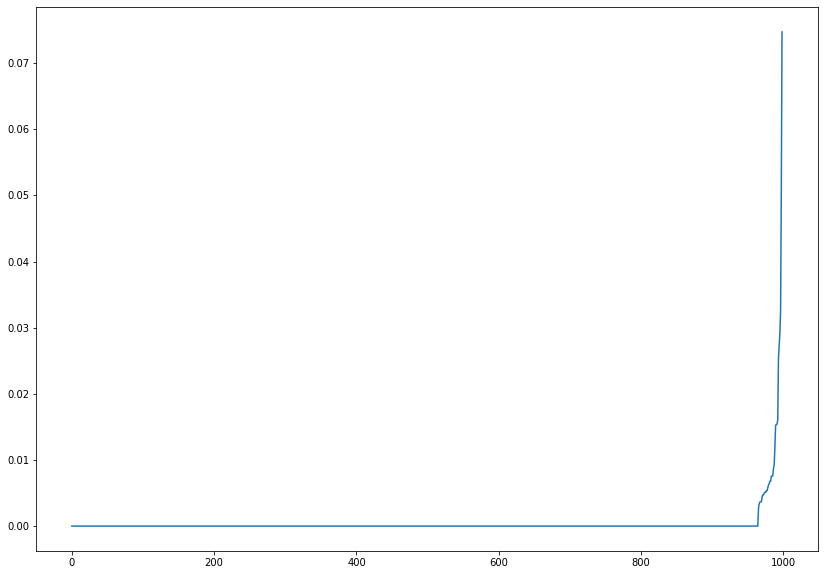

In [12]:

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(lista_pontos)
distances, indices = nbrs.kneighbors(lista_pontos)

"""
for i in distances:
    print(i)
"""

distances = np.sort(distances, axis=0)
distances = distances[:,1]

# o valor ideal para o epsilon será encontrado no ponto de curvatura máxima
plt.plot(distances)

#Para minPts, sugiro não confiar em um método automático, mas no conhecimento do domínio.
#plt.ylim(0.00, 0.01) 

[[ 0.23499626 -0.31404764]
 [ 0.46013923 -0.47069814]
 [-0.25765293 -1.57471683]
 ...
 [ 0.53019439 -0.07708111]
 [ 0.10446631  1.45965034]
 [ 0.51380689 -0.32166368]]
     cluster_index
0                0
1                1
2               -1
3                2
4                3
..             ...
994             29
995             14
996             28
997             -1
998             11

[999 rows x 1 columns]
     cluster_index
331             -1
153             -1
919             -1
641             -1
920             -1
..             ...
678             53
895             54
783             54
911             54
691             54

[999 rows x 1 columns]
Numero de dbscan clusters 55
[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False False  True  True  True  True
  True 

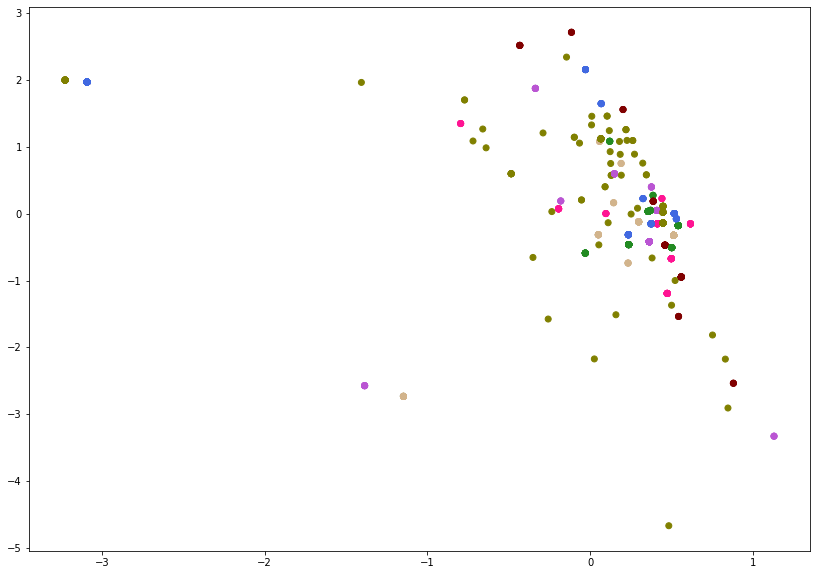

In [14]:
# https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818

X=[]
X= lista_pontos
# print(X)

# VAMOS escalar e standarizar os dados
X = StandardScaler().fit_transform(X)
print(X)




"""
Fonte: https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
Como descobrir o melhor valor de epsilon?
O mais notável é o OPTICS, uma variação do DBSCAN que acaba com o parâmetro epsilon; 
produz um resultado hierárquico que pode ser visto aproximadamente como "executando o DBSCAN com todos os epsilon possíveis".
clustering = OPTICS(min_samples=2).fit(X)
print('Optics:')
print(clustering)
print(clustering.labels_)
print(clustering.get_params())
"""







#settting up DBSCAN
dbscan = DBSCAN(eps=0.0000001, min_samples=3)

# fitting model
model = dbscan.fit(X)

labels = model.labels_

p = pd.DataFrame({'cluster_index':labels})
print(p)

sorted_values_cluster_index=p.sort_values(by=['cluster_index'])
print(sorted_values_cluster_index)

file1 = open("cluster_results.txt","w")

file1.write(sorted_values_cluster_index.to_string())
file1.close()


n_clusters = len(set(labels))-(1 if -1 in labels else 0)
print("Numero de dbscan clusters",n_clusters)


# identificar quais os pontos que compõe os nossos "pontos centrais"
core_samples = np.zeros_like(labels,dtype = bool)

core_samples[dbscan.core_sample_indices_] = True
print(core_samples)

# calcula o número de clusters
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_clusters_


"""
Métricas para medir o desempenho do DBSCAN
Silhuete score: A pontuação da silhueta é calculada utilizando a distância intra-cluster média entre
os pontos, e a distância média mais próxima do cluster.
Por exemplo, um cluster com muitos pontos de dados muito próximos uns dos outros (alta densidade)
e está longe do próximo cluster mais próximo (sugerindo que o cluster é muito original em comparação com o próximo mais próximo),
terá uma pontuação forte de silhueta.
Uma pontuação de silhueta varia de -1 a 1, com -1 sendo a pior pontuação possível e 1 sendo a melhor pontuação. As contagens da silhueta de 0 sugerem conjuntos de sobreposição.

"""
print("Silhouette coefficient: %0.3f" % metrics.silhouette_score(X,labels))


colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive']
#vectorizer = np.vectorize(lambda x: colors[x % len(colors)]) 
colors2 = []
for i in labels:
    colors2.append(colors[i % len(colors)])
colors2= np.array(colors2)

X = np.array(X)
print(len(X))
print(len(X[:,0]))
plt.scatter(X[:,0],X[:,1],c=colors2)